In [32]:
import subprocess
import numpy as np
import mdtraj as md
from tqdm import tqdm_notebook
import time
import matplotlib.pyplot as plt
%pylab inline

print "DSSP (Define Secondary Structure of Proteins) Hydrogen Bonding Algorithm for G protein\n"
print "‘H’ : Helix       ‘G’ : 3-helix (3/10 helix)\n'E’ : Beta ladder ‘B’ : Beta-bridge\n‘C’ : Random Coil ‘T’ : Hydrogen bonded turn\n"
gro_reference = '/home/karl/VoelzLab/ProteinG/gro/p8600/protein_only.gro'
traj_references = '/media/karl/VAV6/PROJ8600/RUN%d/CLONE%d/frame%d.xtc'
nruns = 1
nclones = 40
trajs = []
dssp = []

def load_runs():
    for run in tqdm_notebook(range(nruns), desc='Loading Trajs.'):
        time.sleep(0.01)
        for clone in range(nclones):
            frame = int(subprocess.check_output('ls /media/karl/VAV6/PROJ8600/RUN%d/CLONE%d/frame*.xtc | wc -l' % (run,clone),shell=True))
                if frame >= 0: #if you have a lot of runs, try reducing amount by only selecting ones with long traj lengths
                    for frm in range(frame):
                        loadtrajs = md.load(traj_references%(run,clone,frm),top=gro_reference)
                        if loadtrajs.time[-1]>=0:
                            trajs.append(loadtrajs)
def calculate_dssp():                    
    for t in tqdm_notebook(range(len(trajs)), desc='DSSP Progress'):
        dssp.append(md.compute_dssp(trajs[t]))
        time.sleep(0.01)
        
load_runs()
calculate_dssp()

DSSP (Define Secondary Structure of Proteins) Hydrogen Bonding Algorithm for G protein

‘H’ : Helix       ‘G’ : 3-helix (3/10 helix)
'E’ : Beta ladder ‘B’ : Beta-bridge
‘C’ : Random Coil ‘T’ : Hydrogen bonded turn





In [33]:
from __future__ import division

helixres =[]
betares =[]
coilres = []
totalres = []

# dssp is 3D-array: 1st dimenstion = dssp for every.xtc files
#                   2nd dimension = dssp for 101 frames
#                   3rd dimension = dssp for 1 frame of all 16 residues
for i in range(len(dssp)): # for i in range length of 1st dimension
    for x in range(len(dssp[i])): #for i in range length 2nd dimension
        for z in range(len(dssp[i][x])): # for i in range length 3rd dimension
            totalres.append(z)
            if dssp[i][x][z] == 'H' or dssp[i][x][z] == 'I' or dssp[i][x][z] == 'G':
                helixres.append(z)
            elif dssp[i][x][z] == 'C' or dssp[i][x][z] == 'S' or dssp[i][x][z] == 'T':
                coilres.append(z)
            elif dssp[i][x][z] == 'E' or dssp[i][x][z] == 'B':
                betares.append(z)
                
bins = np.arange(0,16,1)
counts0 = [(helixres==i).astype(int).sum()/(totalres==i).astype(int).sum() for i in bins]
counts1 = [(coilres==i).astype(int).sum()/(totalres==i).astype(int).sum() for i in bins]
counts2 = [(betares==i).astype(int).sum()/(totalres==i).astype(int).sum() for i in bins]

Populating the interactive namespace from numpy and matplotlib


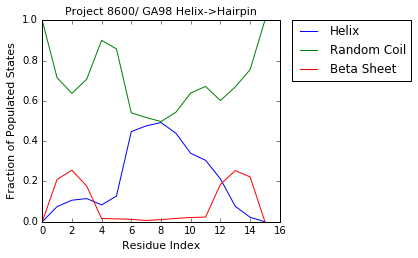

In [34]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.55, 0.70])
ax.plot(counts0, label = 'Helix')
ax.plot(counts1, label='Random Coil')
ax.plot(counts2, label='Beta Sheet')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Residue Index', size=11)
ax.set_ylabel('Fraction of Populated States', size=11)
ax.set_title('Project 8600/ GA98 Helix->Hairpin', size =11)
plt.show
#plt.savefig("DSSP_per_resPROJ8600.png")